Import AlphaFoldXplore before everything else

In [2]:
!git clone https://github.com/AngieLCerrutti/AlphaFoldXplore

Cloning into 'AlphaFoldXplore'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [1]:
from AlphaFoldXplore import alphafoldxplore as afx

If you want to do the actual predictions, you will need to install the main AlphaFold program. That's what this function is for.

Be warned, this and the predict() functions are untested on anything that isn't Colab.

In [2]:
afx.set_up()

  0%|          | 0/55 [elapsed: 00:00 remaining: ?]

A multiFASTA file is accepted for the predict() function.

In [2]:
afx.predict("AlphaFoldXplore/example/proteins.FASTA")

homooligomer: '1'
total_length: '188'
working_directory: 'prediction_NP_004976.2GTPaseKRasisoformb[Homosapiens]_bc749'
MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPMVLVGNKCDLPSRTVDTKQAQDLARSYGIPFIETSAKTRQGVDDAFYTLVREIRKHKEKMSKDGKKKKKKSKTKCVIM
running mmseqs2


  0%|          | 0/1 [elapsed: 00:00 remaining: ?]

/usr/local/lib/python3.7/dist-packages/jax/_src/tree_util.py:189: FutureWarning: jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() instead as a drop-in replacement.
  'instead as a drop-in replacement.', FutureWarning)


model_1_ptm_seed_0 recycles:1 tol:0.00 pLDDT:86.51 pTMscore:0.83
model rank based on pLDDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Protein finished, proceeding...
homooligomer: '1'
total_length: '188'
working_directory: 'prediction_NP_004976.2G13DGTPaseKRasisoformb[Homosapiens]_ecf5a'
MTEYKLVVVGAGDVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPMVLVGNKCDLPSRTVDTKQAQDLARSYGIPFIETSAKTRQGVDDAFYTLVREIRKHKEKMSKDGKKKKKKSKTKCVIM
running mmseqs2


  0%|          | 0/150 [elapsed: 00:00 remaining: ?]

  0%|          | 0/1 [elapsed: 00:00 remaining: ?]

model_1_ptm_seed_0 recycles:1 tol:0.00 pLDDT:88.27 pTMscore:0.84
model rank based on pLDDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Protein finished, proceeding...
homooligomer: '1'
total_length: '188'
working_directory: 'prediction_NP_004976.2G12VGTPaseKRasisoformb[Homosapiens]_a0206'
MTEYKLVVVGAVGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPMVLVGNKCDLPSRTVDTKQAQDLARSYGIPFIETSAKTRQGVDDAFYTLVREIRKHKEKMSKDGKKKKKKSKTKCVIM
running mmseqs2


  0%|          | 0/150 [elapsed: 00:00 remaining: ?]

  0%|          | 0/1 [elapsed: 00:00 remaining: ?]

model_1_ptm_seed_0 recycles:1 tol:0.00 pLDDT:87.96 pTMscore:0.83
model rank based on pLDDT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Protein finished, proceeding...


The predict() functions will drop multiple copies of the resulting predictions: on individual folders, zipped and also grouped on two main folders, which are "pdb_files" and "json_files".

In [3]:
afx.extract_zips() #this is automatically run upon finishing a prediction, but if you add any other zips on another directory you could try it

Now it's time to visualize the results. To simplify things, the following functions exist to grab all predictions and store them on dictionaries. Note that this only works to measure the PAE (Predicted-Aligned Error) and pLDDT (Predicted LDDT-Ca);.

In [4]:
pae_files = afx.get_pae_files()
plddt_files = afx.get_plddt_files()

You can then use the entries straight from the dictionary to see the results.

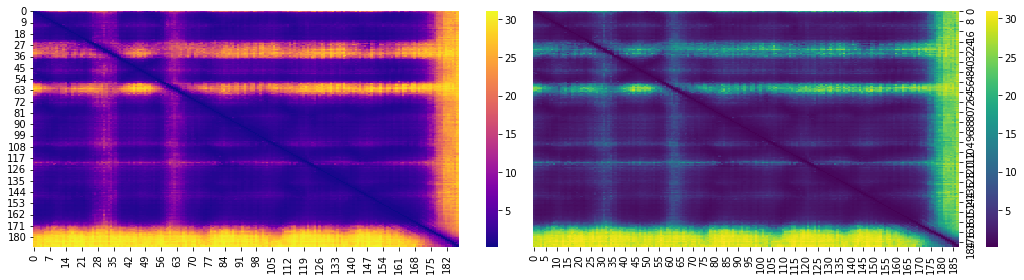

In [6]:
afx.pae_results(pae_files[list(pae_files)[0]], pae_files[list(pae_files)[2]])

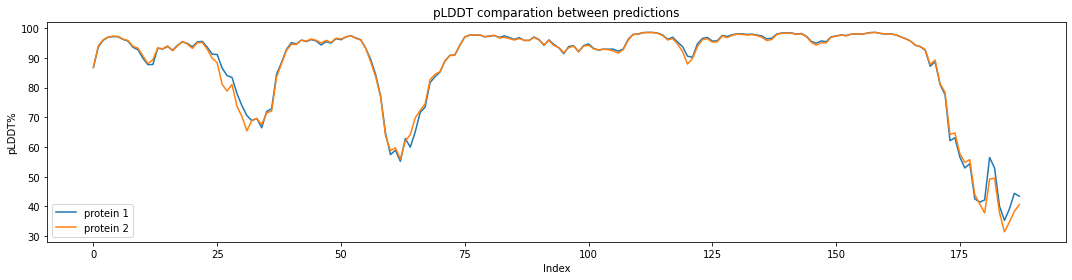

In [7]:
afx.plddt_results(plddt_files[list(plddt_files)[0]], plddt_files[list(plddt_files)[2]])

For both pae_results() and plddt_results(), you can also input the directory string instead.

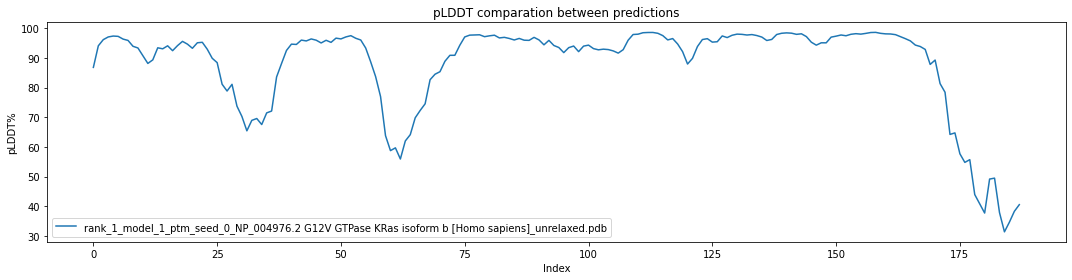

In [12]:
afx.plddt_results("pdb_files/rank_1_model_1_ptm_seed_0_NP_004976.2 G12V GTPase KRas isoform b [Homo sapiens]_unrelaxed.pdb")

Due to Colab limitations, the watch_proteins() function is unable to work seamlessly, but here is how you would use it on Jupyter or a similar viewer. (you may need extra permissions)

In [11]:
view = afx.watch_proteins(f"pdb_files/{list(plddt_files)[0]}")
view

NGLWidget()

Of course, predicted structures aren't usually on the same coordinates. They could be rotated and translated, especially if they were predicted with another program. To calculate the RMSD (Root Mean Square Deviation) between two structures, it is deal to superimpose them first.

Note: to superimpose two proteins, they both must be of the same length.

In [13]:
afx.superimpose_proteins(f"pdb_files/{list(plddt_files)[0]}", f"pdb_files/{list(plddt_files)[2]}")

Mean RMSD from the superimposition is:
0.633923886982031 Å


/usr/local/lib/python3.7/dist-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1507
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1506
  PDBConstructionWarning,


This will rotate and translate the second structure inputted until it matches the first in the best way possible, and then generate a new "superimposed_{name}" file based on said structure, on the folder you're currently on. 

You can use this new file to watch the now superimposed proteins with the watch_proteins() function, or also calculate the individual RMSD between Cα atoms with the following function.

/usr/local/lib/python3.7/dist-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1507
  PDBConstructionWarning,


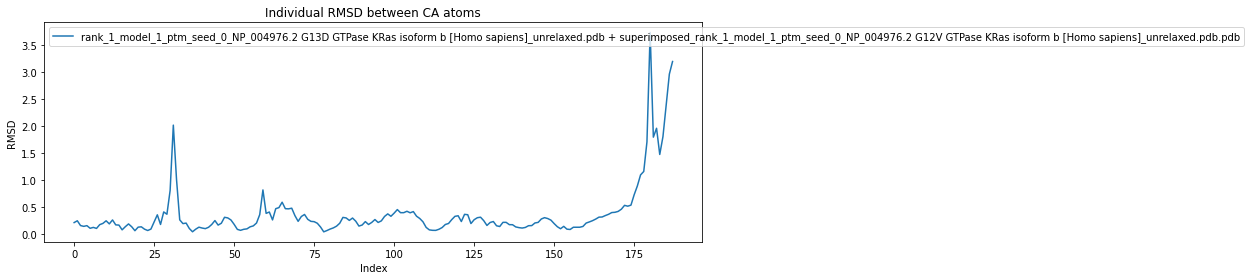

Mean RMSD:
0.6339581335089929 Å


In [21]:
indiv_rmsd = afx.calc_individual_rmsd(f"pdb_files/{list(plddt_files)[0]}", f"superimposed_{list(plddt_files)[2]}.pdb")

This plot indicates, for each pair of Cα atoms from two proteins, the minimum distance between them. This is useful to check out their structural similarity.

The mean RMSD is also printed at the end.